# Homework 1 Rosini Micol

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
from itertools import combinations

In [2]:
# Utils cell

# Define a function to init edge's labels
def assign_labels(edges):
    d = {}
    for i, e in enumerate(edges):
        d[e] = f"$e_{i+1}$"
    return d


# Define a function to assign feature 'capacity' to every edge
def init_capacities(G, capacities):
    for (a,b), capacity in zip(capacities.keys(), capacities.values()):
        G[a][b]['capacity'] = capacity
        
        
# Define a function to init edges' labels with their capacity
def assign_labels_capacities(capacities):
    d = {}
    for k,cap in zip(capacities.keys(), capacities.values()):
            d[k] = f"c = {cap}"
    return d
        

def assign_labels_flows(nodes_flow):
    d = {}
    for nodein in nodes_flow.keys():
        flows = nodes_flow[nodein]
        for nodeout,value in zip(flows.keys(), flows.values()):
            d[(nodein,nodeout)] = f"f = {value}"
    return d


def nodepartition(G, o, d):
    allnodepartition = []
    od= [o,d]
    tocombine = list(set(G.nodes()) - set(od))
    for i in range(len(tocombine)+1):
        combination = combinations(tocombine, i)
        for c in list(combination):
            partition1 = list(c)
            partition1.insert(0, o)
            partition2 = list(set(G.nodes()) - set(partition1))
        
            allnodepartition.append([partition1,partition2])      
    return allnodepartition


def calculation_cut_capacity(G, allpartitions):
    allcutcapacity = []
    for p in allpartitions:
        partition1 = p[0]
        partition2 = p[1]
        cutcapacity = 0
        for node1 in partition1:
            for node2 in partition2:
                if (node1, node2) in G.edges():
                    cutcapacity += G[node1][node2]['capacity']
        allcutcapacity.append(cutcapacity)
    return allcutcapacity    

## Exercise 1
Consider the network in Figure 1 with link capacities: \
$c_2 = c_4 = c_6 = 1$ \
$c_1 = c_3 = c_5 = 2$ 

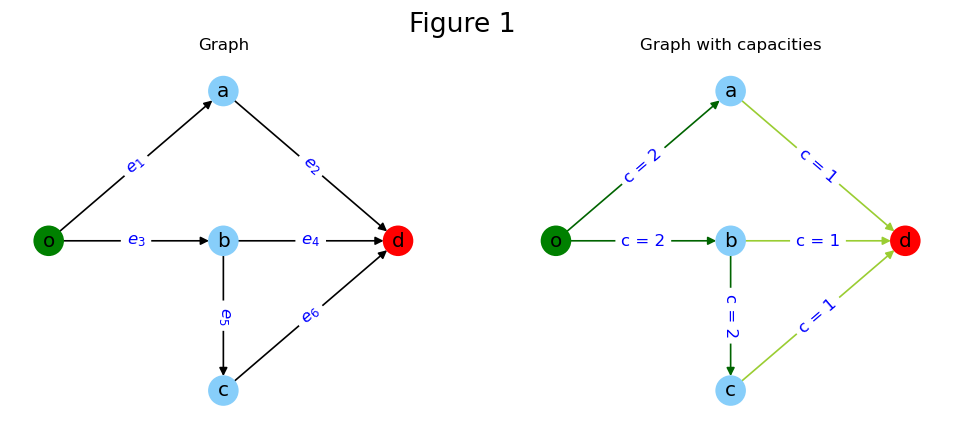

In [3]:
# Drawing the graph of the exercise

fig, ax = plt.subplots(1,2, figsize = (10,4), dpi=120)

G = nx.DiGraph()
edges = [('o','a'),('a','d'),('o','b'),('b','d'),('b','c'),('c','d')]
G.add_edges_from(edges)
pos = {'o': [40, 20], 'a': [60, 35], 'b': [60, 20], 'c': [60, 5], 'd': [80,20]}
capacities = {('o','a'):2,('a','d'):1,('o','b'):2,\
              ('b','d'):1, ('b','c'): 2, ('c','d'): 1}

# Assign feature 'capacity' to every edge
init_capacities(G, capacities = capacities)
    
node_color = ['green', 'lightskyblue', 'red', 'lightskyblue', 'lightskyblue']
edge_color = ['darkgreen' if capacities[(a,b)]== 2 else 'yellowgreen' for (a,b) in G.edges() ]

# Script to draw labels on the graph
nx.draw(G, pos,  with_labels=True, ax=ax[0], node_color = node_color)
nx.draw_networkx_edge_labels(G,pos,edge_labels=assign_labels(edges), font_color='blue', ax=ax[0])
ax[0].set_title("Graph", fontsize=10)


nx.draw(G,pos, with_labels=True,ax= ax[1], edge_color = edge_color, node_color = node_color)
nx.draw_networkx_edge_labels(G,pos, edge_labels = assign_labels_capacities(capacities), font_color='blue', ax=ax[1])
ax[1].set_title("Graph with capacities", fontsize=10)


fig.suptitle('Figure 1', fontsize=16)
plt.savefig('fig/graph1.png')

### Question a :
What is the minimum aggregate capacity that needs to be removed for no feasible flow from  $o$  to  $d$  to exist?

***Solution*** \
The **Max-Flow Min-Cut Theorem** states that, given a multigraph $G = (\mathcal{V}, \mathcal{E}, c) $ with a capacity vector $c>0$, and two distinct nodes $ o \neq d $ in $\mathcal{V}$, then the *maximum throughput* $\tau_{o,d}^*$ from $o$ to $d$ is equal to the *min-cut capacity* $c_{o,d}^*$ of the network :

$$ \tau_{o,d}^* = c_{o,d}^* $$


This is equivalent to state that the ***minimum total capacity*** that needs to be removed from the network in order to make node $d$ not reachable from node $o$ coincides with the ***min-cut capacity*** $c^∗_{o,d}$.


Indeed, if all the links are removed in a minimum capacity $o-d$ cut (and so, removing a total capacity $c_{o,d}^*$) then, the min-cut capacity of the resulting graph would be 0 and the theorem above would imply that there exists ***no feasible*** flow from node $o$ to node $d$ in such resulting graph, except the one with all-zero, hence $d$ would not be reachable from $o$.


Furthermore, if the total capacity removed is less than $c_{o,d}^*$ , the min-cut capacity of the resulting graph would still be positive so that the theorem would imply that there exists a ***feasible flow*** with positive throughput from node $o$ to node $d$.

In order to obtain the min-cut capacity we need to compute the capacities of all cuts of the network that are $2^{n - 2}$ where $n$ is the number of nodes\.
The cuts of the network above are:
- $U=\{ o, a, b, c\}, U^C=\{d\}$
- $U=\{o, a, b\}, U^C=\{c, d\}$
- $U=\{o, a, c\}, U^C=\{b, d\}$
- $U=\{o, b, c\}, U^C=\{a, d\}$
- $U=\{o, a \}, U^C=\{b, c, d\}$
- $U=\{o, b \}, U^C=\{a, c, d\}$
- $U=\{o, c \}, U^C=\{a, b, d\}$
- $U=\{o \}, U^C=\{a, b, c, d\}$

The capacity of each cut is:

- $U=\{ o, a, b, c\}, U^C=\{d\}$ -> $C_U = 3$
- $U=\{o, a, b\}, U^C=\{c, d\}$ -> $C_U = 4$
- $U=\{o, a, c\}, U^C=\{b, d\}$ -> $C_U = 4$
- $U=\{o, b, c\}, U^C=\{a, d\}$ -> $C_U = 4$ 
- $U=\{o, a \}, U^C=\{b, c, d\}$ -> $C_U = 3$
- $U=\{o, b \}, U^C=\{a, c, d\}$ -> $C_U = 5$
- $U=\{o, c \}, U^C=\{a, b, d\}$ -> $C_U = 5$
- $U=\{o \}, U^C=\{a, b, c, d\}$ -> $C_U = 4$



We can check our result obtained by hand with the following functions which returns oall the possible cuts and all their capacity:

In [4]:
print('These are all the possible cuts, i.e. all the possible node partition:\n'  )
all_possible_partitions = nodepartition(G, 'o', 'd')
cutcapacity_of_each_partition = calculation_cut_capacity(G, all_possible_partitions)
#i = 0
for i,p in enumerate(all_possible_partitions):
    print('cut partition:',p,'-> cut capacity:',cutcapacity_of_each_partition[i])
    #i+=1

These are all the possible cuts, i.e. all the possible node partition:

cut partition: [['o'], ['d', 'b', 'c', 'a']] -> cut capacity: 4
cut partition: [['o', 'b'], ['d', 'c', 'a']] -> cut capacity: 5
cut partition: [['o', 'c'], ['d', 'b', 'a']] -> cut capacity: 5
cut partition: [['o', 'a'], ['d', 'c', 'b']] -> cut capacity: 3
cut partition: [['o', 'b', 'c'], ['d', 'a']] -> cut capacity: 4
cut partition: [['o', 'b', 'a'], ['d', 'c']] -> cut capacity: 4
cut partition: [['o', 'c', 'a'], ['d', 'b']] -> cut capacity: 4
cut partition: [['o', 'b', 'c', 'a'], ['d']] -> cut capacity: 3


So, we have demostrated that the $o-d$ min-cut has capacity ***3***, thus the ***minimum aggregate capacity*** that needs to be removed for no feasible flow from $o$ to $d$ to exist is ***3*** 
We can check our result with NetworkX functions for flow applications, e.g., `networkx.algorithms.flow.maximum_flow` and `networkx.algorithms.flow.minimum_cut`, which compute the maximum throughput and the value and the node partition of a minimum cut, respectively.

The maximum throughput from o-d is: 3
It can be reached with the following flow distribution: {'o': {'a': 1, 'b': 2}, 'a': {'d': 1}, 'd': {}, 'b': {'d': 1, 'c': 1}, 'c': {'d': 1}}
The minimum cut capacity of the o-d cut is: 3
This is one of the node partition which gives the min-cut ({'o', 'b', 'c', 'a'}, {'d'})


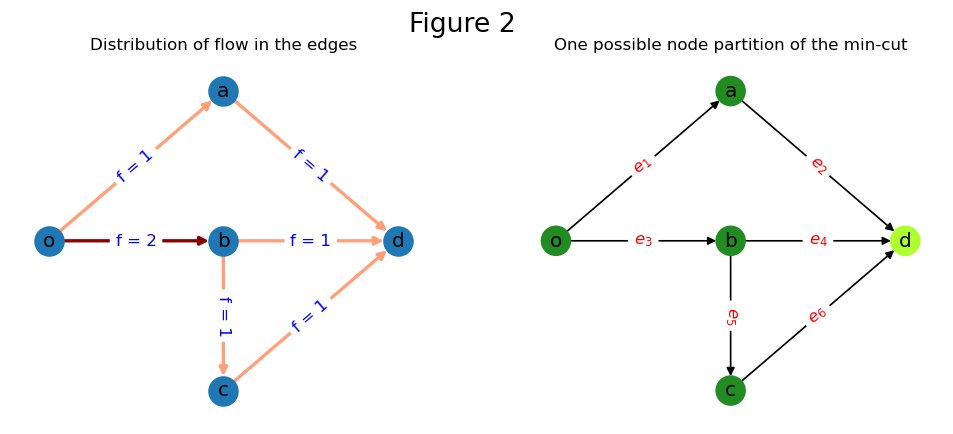

In [5]:
# Calculate maximum throughput and the minimum cut capacity
flow, nodes_flow = nx.algorithms.flow.maximum_flow(G,'o','d')
min_cut_capacity, node_partition_min_cut = nx.algorithms.flow.minimum_cut(G, 'o', 'd')

print('The maximum throughput from o-d is:', flow)
print('It can be reached with the following flow distribution:', nodes_flow)
print('The minimum cut capacity of the o-d cut is:' , min_cut_capacity)
print('This is one of the node partition which gives the min-cut', node_partition_min_cut)


# Drawing the graph with the correponding flow value for each edge in the first subplot, and the graph with its node partition for the min-cut in the second subplot 
fig, ax = plt.subplots(1,2, figsize = (10,4), dpi=120)


edge_flow = assign_labels_flows(nodes_flow)
for (a,b) in G.edges():
    if edge_flow[(a,b)] == ' f = 2':
        print((a,b))

node_color = ['forestgreen' if a in node_partition_min_cut[0] else 'greenyellow' for a in G.nodes()]
edge_color = ['darkred' if int(edge_flow[(a,b)][-1]) == 2 else 'lightsalmon' for (a,b) in G.edges()]

# Script to draw flows on the graph
nx.draw(G, pos,  with_labels=True, ax=ax[0], edge_color = edge_color, width = 2.0)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_flow, font_color='blue', ax=ax[0])
ax[0].set_title("Distribution of flow in the edges", fontsize=10)

# Script to draw the 2 node-partition of the min-cut
nx.draw(G,pos, with_labels=True,ax= ax[1], node_color = node_color)
nx.draw_networkx_edge_labels(G,pos, edge_labels = assign_labels(edges), font_color='red', ax=ax[1])
ax[1].set_title("One possible node partition of the min-cut", fontsize=10)


fig.suptitle('Figure 2', fontsize=16)
plt.savefig('fig/graph2.png')



        


As the ***Max-Flow Min-Cut Theorem*** states, the minimum cut capacity and the maximum throughput are equal, and they also coincide with the ***minimum aggregate capacity*** that needs to be removed for no feasible flow from o to d to exist'

### Question b  :
What is the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from _o_ to _d_ ?

***Solution*** \
The maximum throughput is 3 and it is strictly related to the node partitions which gives the minimum cut, that are:

- $U=\{ o, a, b, c\}, U^C=\{d\}$ -> $C_U = 3$
- $U=\{o, a \}, U^C=\{b, c, d\}$ -> $C_U = 3$

So, if we want to remove the maximum capacity without affecting it, the capacities of the links that contributes to that minimum capacity cannot be changed. 

Therefore, the capacities of $e_2$, $e_3$, $e_4$ and $e_6$ cannot be decreased, otherwise the min-cut capacity and so the maximum throughput will decrease.

The only capacities that can be removed without having any change on $\tau_{o,d}^*$ are the ones of $e_1$ and $e_5$. Both edges have capacity $c = 2$. So $c_1 + c_5 = 4$ will be the maximum possible amount of capacity to be removed.

For example, we try to remove $1$ from $c_1$ and $1$ from $c_5$, let's compute the new updated cut capacities:




In [6]:
init_capacities(G, capacities)
G['o']['a']['capacity'] -= 1
G['b']['c']['capacity'] -= 1
all_possible_partitions = nodepartition(G, 'o', 'd')
cutcapacity_of_each_partition = calculation_cut_capacity(G, all_possible_partitions)
i = 0
for p in all_possible_partitions:
    print('cut partitions:',p,'-> cut capacity:',cutcapacity_of_each_partition[i])
    i+=1
init_capacities(G, capacities)


cut partitions: [['o'], ['d', 'b', 'c', 'a']] -> cut capacity: 3
cut partitions: [['o', 'b'], ['d', 'c', 'a']] -> cut capacity: 3
cut partitions: [['o', 'c'], ['d', 'b', 'a']] -> cut capacity: 4
cut partitions: [['o', 'a'], ['d', 'c', 'b']] -> cut capacity: 3
cut partitions: [['o', 'b', 'c'], ['d', 'a']] -> cut capacity: 3
cut partitions: [['o', 'b', 'a'], ['d', 'c']] -> cut capacity: 3
cut partitions: [['o', 'c', 'a'], ['d', 'b']] -> cut capacity: 4
cut partitions: [['o', 'b', 'c', 'a'], ['d']] -> cut capacity: 3


The min-cut capacity will remain 3.

Instead, if we remove $2$ from $c_1$ and $0$ from $c_5$, we will obtain the following cut capacities:

In [7]:
init_capacities(G, capacities)
G['o']['a']['capacity'] -= 2

all_possible_partitions = nodepartition(G, 'o', 'd')
cutcapacity_of_each_partition = calculation_cut_capacity(G, all_possible_partitions)
i = 0
for p in all_possible_partitions:
    print('cut partitions:',p,'-> cut capacity:',cutcapacity_of_each_partition[i])
    i+=1
init_capacities(G, capacities)



cut partitions: [['o'], ['d', 'b', 'c', 'a']] -> cut capacity: 2
cut partitions: [['o', 'b'], ['d', 'c', 'a']] -> cut capacity: 3
cut partitions: [['o', 'c'], ['d', 'b', 'a']] -> cut capacity: 3
cut partitions: [['o', 'a'], ['d', 'c', 'b']] -> cut capacity: 3
cut partitions: [['o', 'b', 'c'], ['d', 'a']] -> cut capacity: 2
cut partitions: [['o', 'b', 'a'], ['d', 'c']] -> cut capacity: 4
cut partitions: [['o', 'c', 'a'], ['d', 'b']] -> cut capacity: 4
cut partitions: [['o', 'b', 'c', 'a'], ['d']] -> cut capacity: 3


And so, the min-cut capacity and the maximum throughput will be 2.

As last try, if we remove  $2$ from $c_5$ and $0$ from $c_1$:

In [8]:
init_capacities(G, capacities)
G['b']['c']['capacity'] -= 2

all_possible_partitions = nodepartition(G, 'o', 'd')
cutcapacity_of_each_partition = calculation_cut_capacity(G, all_possible_partitions)
i = 0
for p in all_possible_partitions:
    print('cut partitions:',p,'-> cut capacity:',cutcapacity_of_each_partition[i])
    i+=1
init_capacities(G, capacities)



cut partitions: [['o'], ['d', 'b', 'c', 'a']] -> cut capacity: 4
cut partitions: [['o', 'b'], ['d', 'c', 'a']] -> cut capacity: 3
cut partitions: [['o', 'c'], ['d', 'b', 'a']] -> cut capacity: 5
cut partitions: [['o', 'a'], ['d', 'c', 'b']] -> cut capacity: 3
cut partitions: [['o', 'b', 'c'], ['d', 'a']] -> cut capacity: 4
cut partitions: [['o', 'b', 'a'], ['d', 'c']] -> cut capacity: 2
cut partitions: [['o', 'c', 'a'], ['d', 'b']] -> cut capacity: 4
cut partitions: [['o', 'b', 'c', 'a'], ['d']] -> cut capacity: 3


Also in this case, the min-cut capacity and the maximum throughput will be 2.

The only feasible solution is to remove $1$ from $c_1$ and $1$ from $c_5$ , since this change doesn't affect the maximum throughput $\tau_{o,d}^*$

We can check our result using the following algorithm:

In [9]:
# Define the maximal throughput that cannot decrease
max_throughput, _ = nx.algorithms.flow.maximum_flow(G,'o','d')

# Define the maximum number of iterations the code will do
max_capacity = max(capacities.values())

# Define a dictionary with the edges as keys and the flow that can be removed as values
maximum_agg_capacity_toremove = {k:0 for k in capacities.keys()}

while max_capacity >= 0:

    for (a,b) in capacities.keys():
        
        if G[a][b]['capacity'] != 0:
            # Try to remove 1 from the capacity
            G[a][b]['capacity'] -= 1
            
            new_max_throughput, _ = nx.algorithms.flow.maximum_flow(G,'o','d')
            
            # If the capacity removed didn't affect the maximal throghput
            if max_throughput == new_max_throughput:
                
                # Update the dictionary of capacities that can be removed
                maximum_agg_capacity_toremove[(a,b)] += 1
                
            else:
                
                # Restore the capacity
                G[a][b]['capacity'] += 1
                  
    max_capacity -= 1

maximum_aggregate_capacity = sum(maximum_agg_capacity_toremove.values())

#saving the new capacities in a dictionary

new_capacities = {k:0 for k in capacities.keys()}
for (a,b) in capacities.keys():
    new_capacities[a,b] = G[a][b]['capacity']

print('Maximum aggregate capacity removed:', maximum_aggregate_capacity)
print('Amount of capacity that can be removed from every node: ', maximum_agg_capacity_toremove)  
#init_capacities(G)


Maximum aggregate capacity removed: 2
Amount of capacity that can be removed from every node:  {('o', 'a'): 1, ('a', 'd'): 0, ('o', 'b'): 0, ('b', 'd'): 0, ('b', 'c'): 1, ('c', 'd'): 0}


As we can see from the algorithm above, the maximum aggregate capacity that can be removed from the links without affecting the maximum throughput from $o$ to $d$ is $2$: $1$ capacity from the edge $o-a$ and $1$ from the edge $b-c$. This is the only feasible solution.

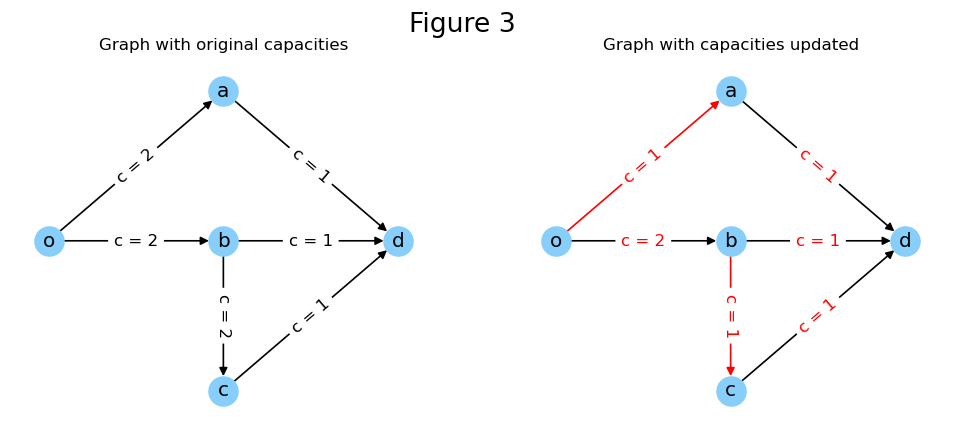

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,4), dpi=120)
init_capacities(G, capacities)



# Original Graph
nx.draw(G, pos,  with_labels=True, ax=ax[0], node_color = 'lightskyblue')
nx.draw_networkx_edge_labels(G,pos,edge_labels = assign_labels_capacities(capacities), font_color='black', ax=ax[0])
ax[0].set_title("Graph with original capacities", fontsize=10)


# Graph with capacities updated
edge_color = ['red','black','black','black','red','black']
nx.draw(G,pos, with_labels=True,ax= ax[1], edge_color = edge_color, node_color = 'lightskyblue')
nx.draw_networkx_edge_labels(G,pos,edge_labels = assign_labels_capacities(new_capacities), font_color='red', ax=ax[1])
ax[1].set_title("Graph with capacities updated", fontsize=10)


fig.suptitle('Figure 3', fontsize=16)
plt.savefig('fig/graph3.png')
plt.show()



### Question c
You are given $x > 0$ extra units of capacity. How should you distribute them in order to maximize the throughput that can be sent from $o$ to $d$? Plot the maximum throughput from $o$ to $d$ as a function of $x \geq 0$


#### _Solution_
The capacity should be allocated in such a way that the capacity of the min-cut is maximized, i.e. on the links between the set of the minimal cut:

- $ U = \{ o, a, b, c \}, U^C = \{d\} $ -> $ C_U = 3 $
- $ U = \{o, a\}, U^C = \{b, c, d\} $ -> $ C_U = 3 $

i.e. on $e_2, e_3, e_4, e_6$

Let's create this algorithm that automatically distribute the units x of capacity in such a way that the ***throughput is maximized***, by calculating each time that I allocate a new capacity all the partitions that gives the minimum cut and find between all the set of edge that contributes to the minimum cut, the one which gives the maximum throughput with the addition of a 1 unit of capacity .

In [11]:
# Restore the original capacity that can be modified by the algorithm
init_capacities(G, capacities)


# List of maximum throughputs of different amounts of capacity added
flows = list()
min_cut_capacity, _ = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
flows.append(min_cut_capacity) # Add initial min-cut capacity    



# Let's try with a maximum amount of capacity added = 50
for x in range(1,50):
    
    d = {}  # Dictionary of all the maximum throughput due to the addition of 1 capacity to a specific edge
    #min_cut_capacity, _ = nx.algorithms.flow.minimum_cut(G, 'o', 'd')
    all_possible_partitions = nodepartition(G, 'o', 'd')  # Returns all the possible cut-partition U and U_C
    cutcapacity_of_each_partition = calculation_cut_capacity(G, all_possible_partitions) # Returns the cut-capacity for each cut-partition
    minimum = min(cutcapacity_of_each_partition) # The min-cut capacity
    indeces = [i for i, x in enumerate(cutcapacity_of_each_partition) if x == minimum ] # All the indices that correspond to the cut-partitions which gives the min-cut capacity
    
    
    # Iteration on all the possible min-cut partition
    for index in indeces: 
        node_partition_min_cut = all_possible_partitions[index] # The min-cut partition
        u = node_partition_min_cut[0]
        u_c = node_partition_min_cut[1]
        
        for a in u:
            for b in u_c:
                    # Check if the edge (a,b) is an edge (if so, it would be an edge between the set of the min-cut)  
                    if (a,b) in G.edges():
                        G[a][b]['capacity'] += 1
                        new_min_cut_capacity, _ = nx.algorithms.flow.minimum_cut(G, 'o', 'd') # new Min-Cut capacity when adding +1 on the capacity of edge (a,b)
                        d[(a,b)]= new_min_cut_capacity # Store in the dictionary the maximum throughput
                        G[a][b]['capacity'] -= 1 # Restore capacity
                        
                        
    edge = max(d, key = d.get) # The edge on which will be added the capacity will be the one which gives the maximum throughput among all
    (a,b) = edge
    G[a][b]['capacity']+=1
    
   
    flow, nodes_flow = nx.algorithms.flow.maximum_flow(G,'o','d') 
    flows.append(flow) 
    


Now we can visualize how the maximum throughput $ \tau_{o,d}^* $ of the graph varies by the units of capacity $c$ added:

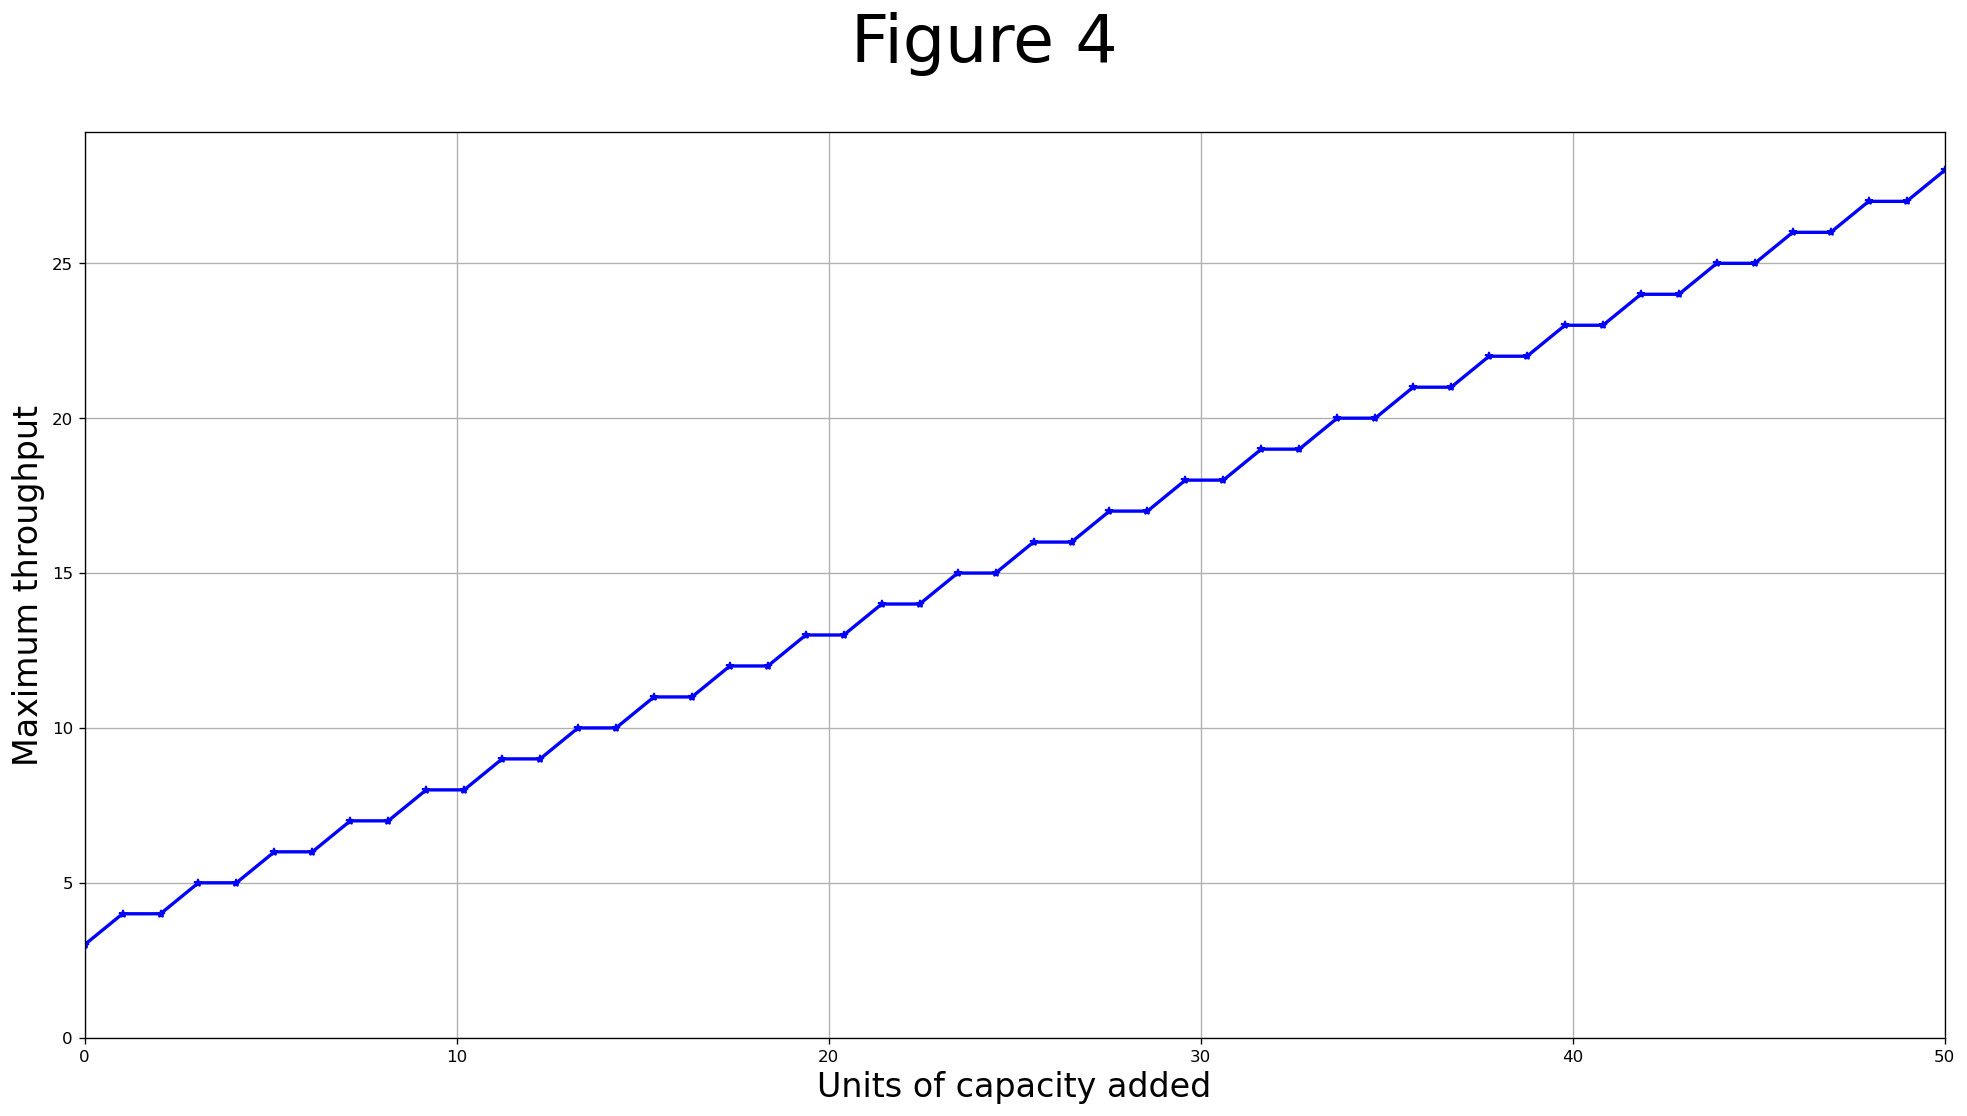

In [12]:
fig,ax = plt.subplots(figsize=(20,10),dpi=120)

ax.plot(np.linspace(0, 50, 50), flows, color ='blue', marker='*',linewidth=2, markersize=5)

ax.set_xlabel("Units of capacity added", fontsize = 20)
ax.set_xlim(left = 0.0, right = 50.0)

ax.set_ylabel("Maximum throughput", fontsize = 20)
ax.set_ylim(bottom = 0.0)

ax.grid()

fig.suptitle('Figure 4', fontsize=40)
plt.savefig('fig/graph4.png')



plt.show()

